### Plotting WY22 winter and non-winter event NO3 yields, NO3/Q yield ratios, and cumulative yields. 
### Also bringing in soil resin NO3 cumulative 'yields'

### Contextualizaing data: Kincaid et al., 2020 Hungerford and Wade data (2014-2018 non-winter events)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts

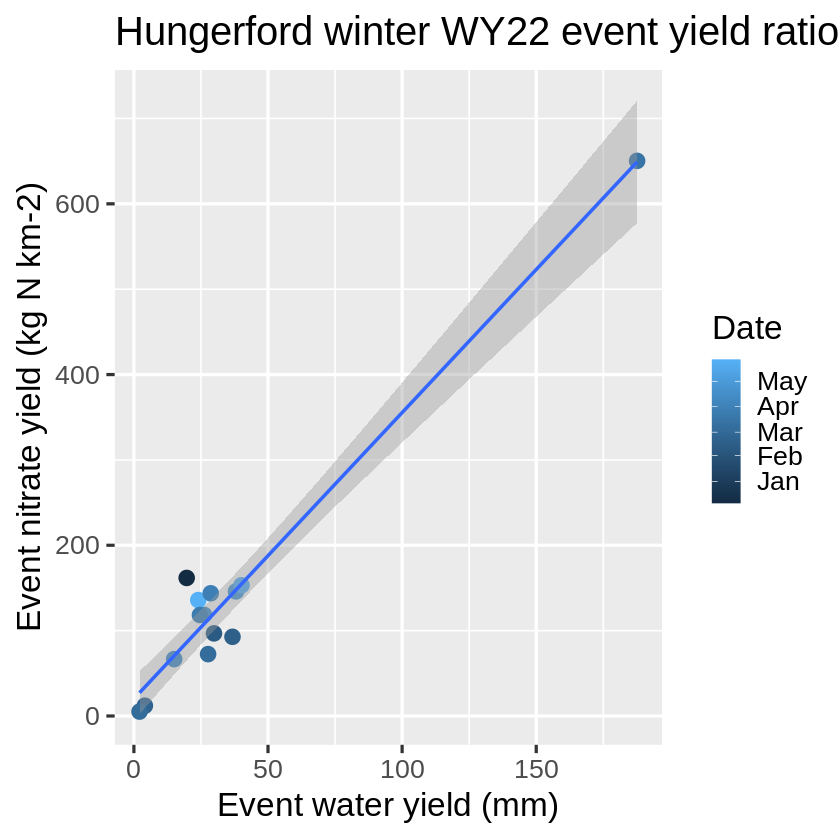

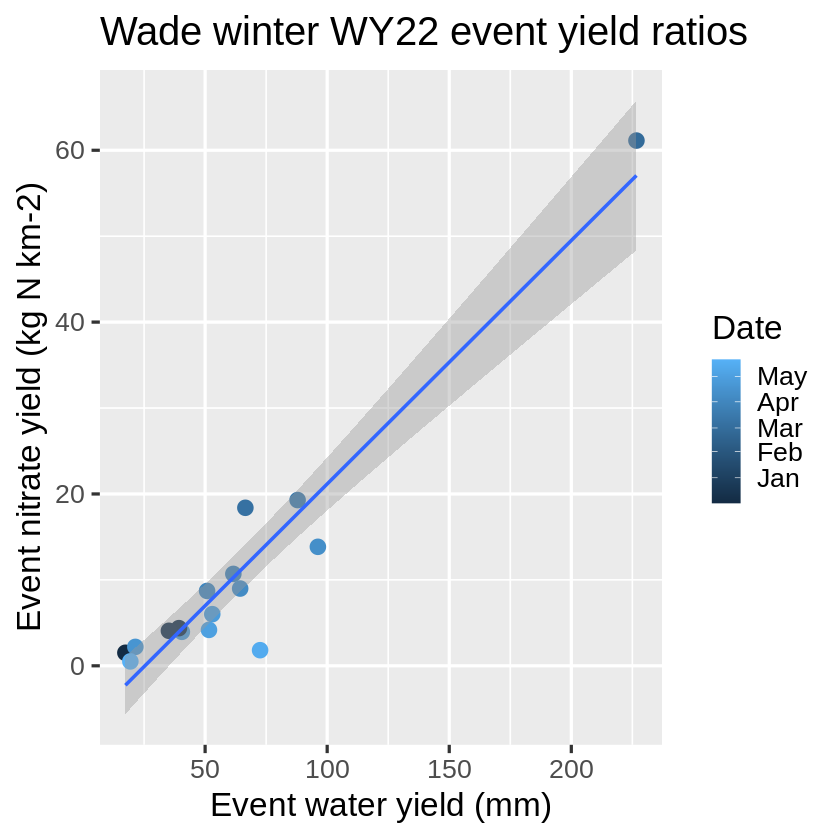

In [1]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"

# custom event delineation scripts puts original yields here:
SV_2021_2023_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/"
DK_2014_2018_yield_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/output/"

################
# READ IN DATA #
################

# Read in cumulative 2021-2023 winter NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/sonya-may24/SV-2024.05.24-data_Millar_custom-input.ipynb
hungerford_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Millar-delineated 2021-2023 non-ice NO3 yield and water yield data
# Same notebook as the custom input, but it also runs the Millar event delineation, then we'll separate out non-winter further down
# Just the 0.996 RDF results with SFT = 0.1
hungerford_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Just the 0.996 RDF results with SFT = 0.05
wade_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Kincaid 2014-2018 non-ice NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/Kincaid2020_Millar_custom-input.ipynb
hungerford_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Hungerford_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Wade_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

###############
# FILTER DATA #
###############

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Define Winter Water Year 2022
wwy22_start <- as.Date("2021-12-01")
wwy22_end <- as.Date("2022-05-01")

# Define Winter Water Year 2023
wwy23_start <- as.Date("2022-12-01")
wwy23_end <- as.Date("2023-05-01")

# Filter SV data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter SV data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
wade_yield_data_yearly_23 <- wade_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY22
hungerford_yield_data_yearly_22 <- hungerford_yield_data_yearly_2123 %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter non-winter data for WY22
wade_yield_data_yearly_22 <- wade_yield_data_yearly_2123 %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Filter data for Water Year 2023
resin_data_wy23 <- resin_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Winter Water Year 2023
resin_data_winter_wy23 <- resin_data %>%
  filter(Date >= wwy23_start & Date <= wwy23_end)

# Filter data for Water Year 2022
resin_data_wy22 <- resin_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Winter Water Year 2022
resin_data_winter_wy22 <- resin_data %>%
  filter(Date >= wwy22_start & Date <= wwy22_end)

######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


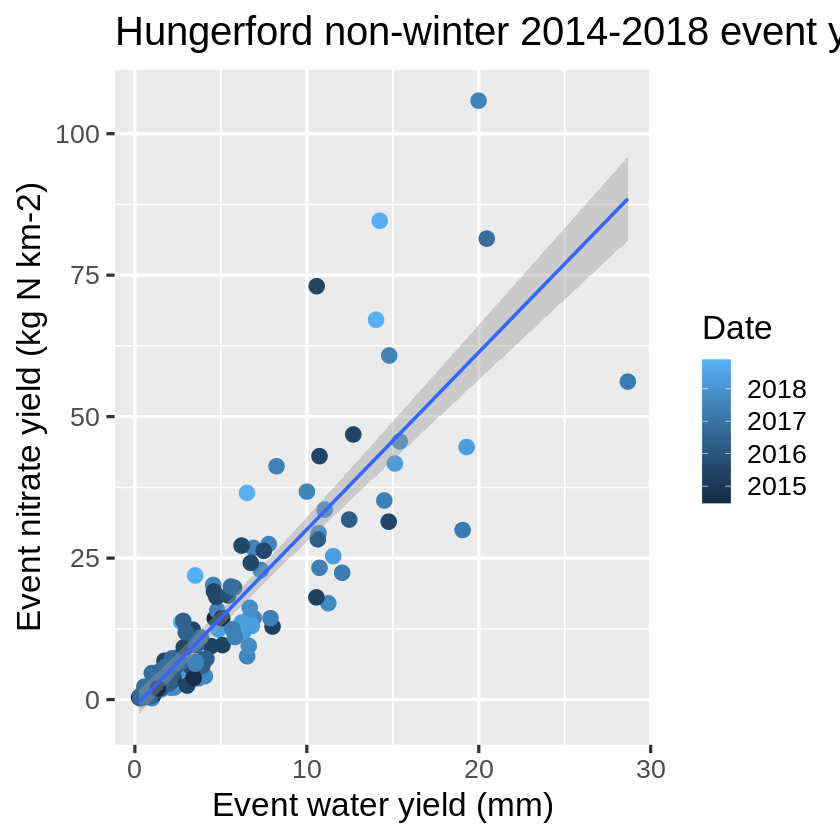

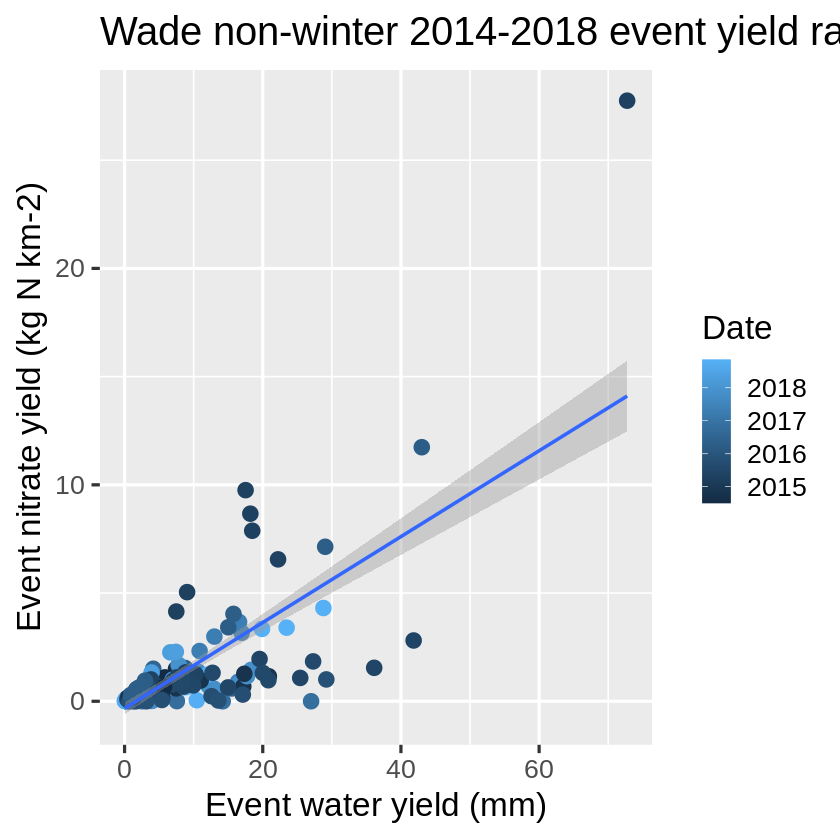

In [2]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


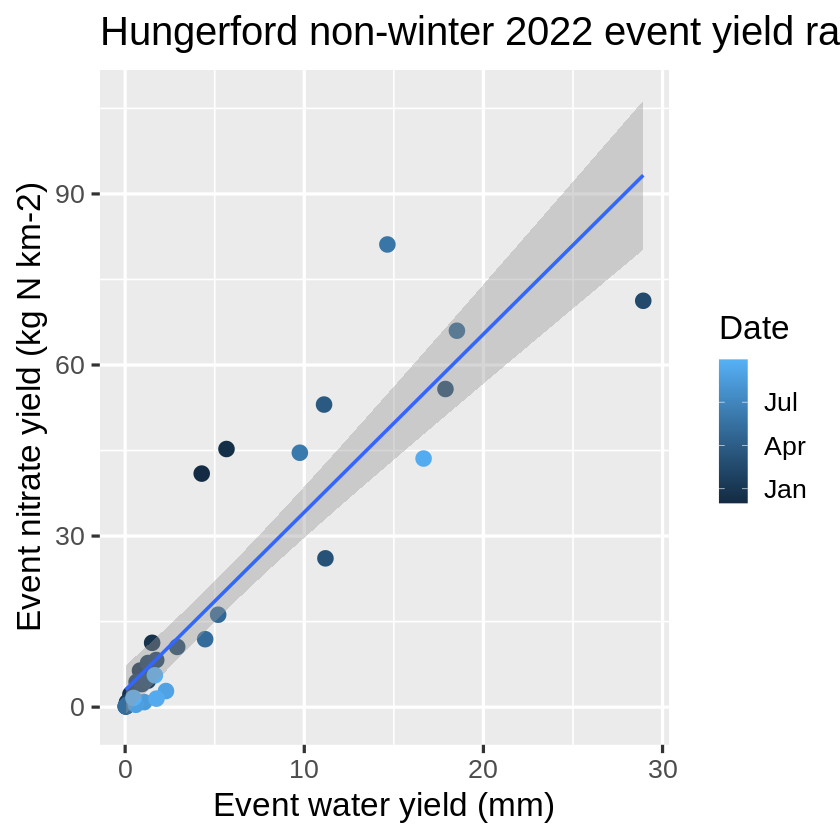

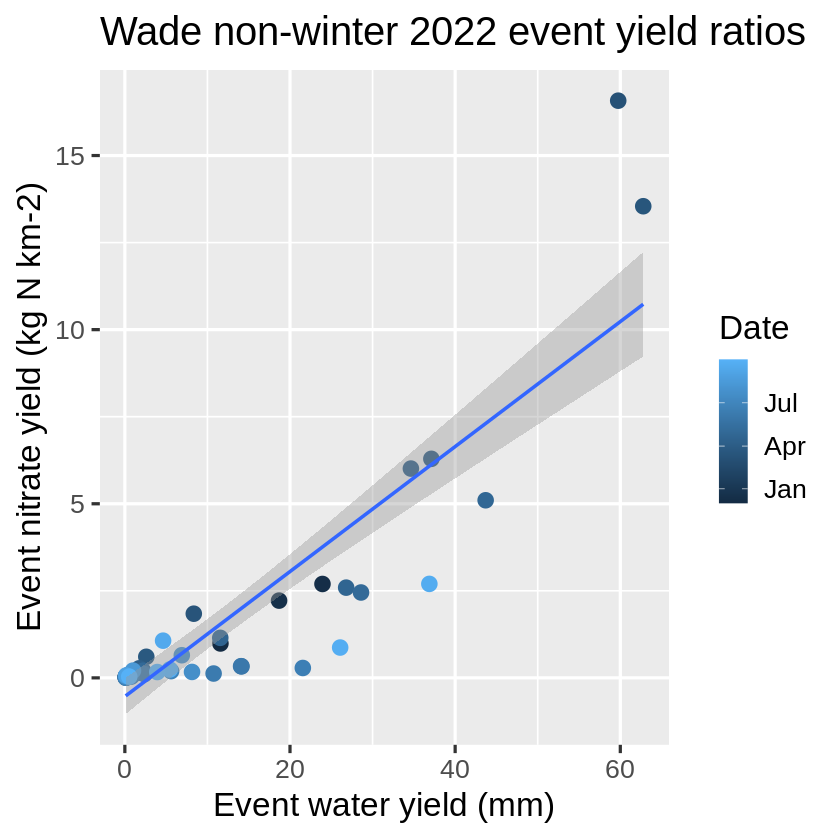

In [3]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly_22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2022 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly_22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2022 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'


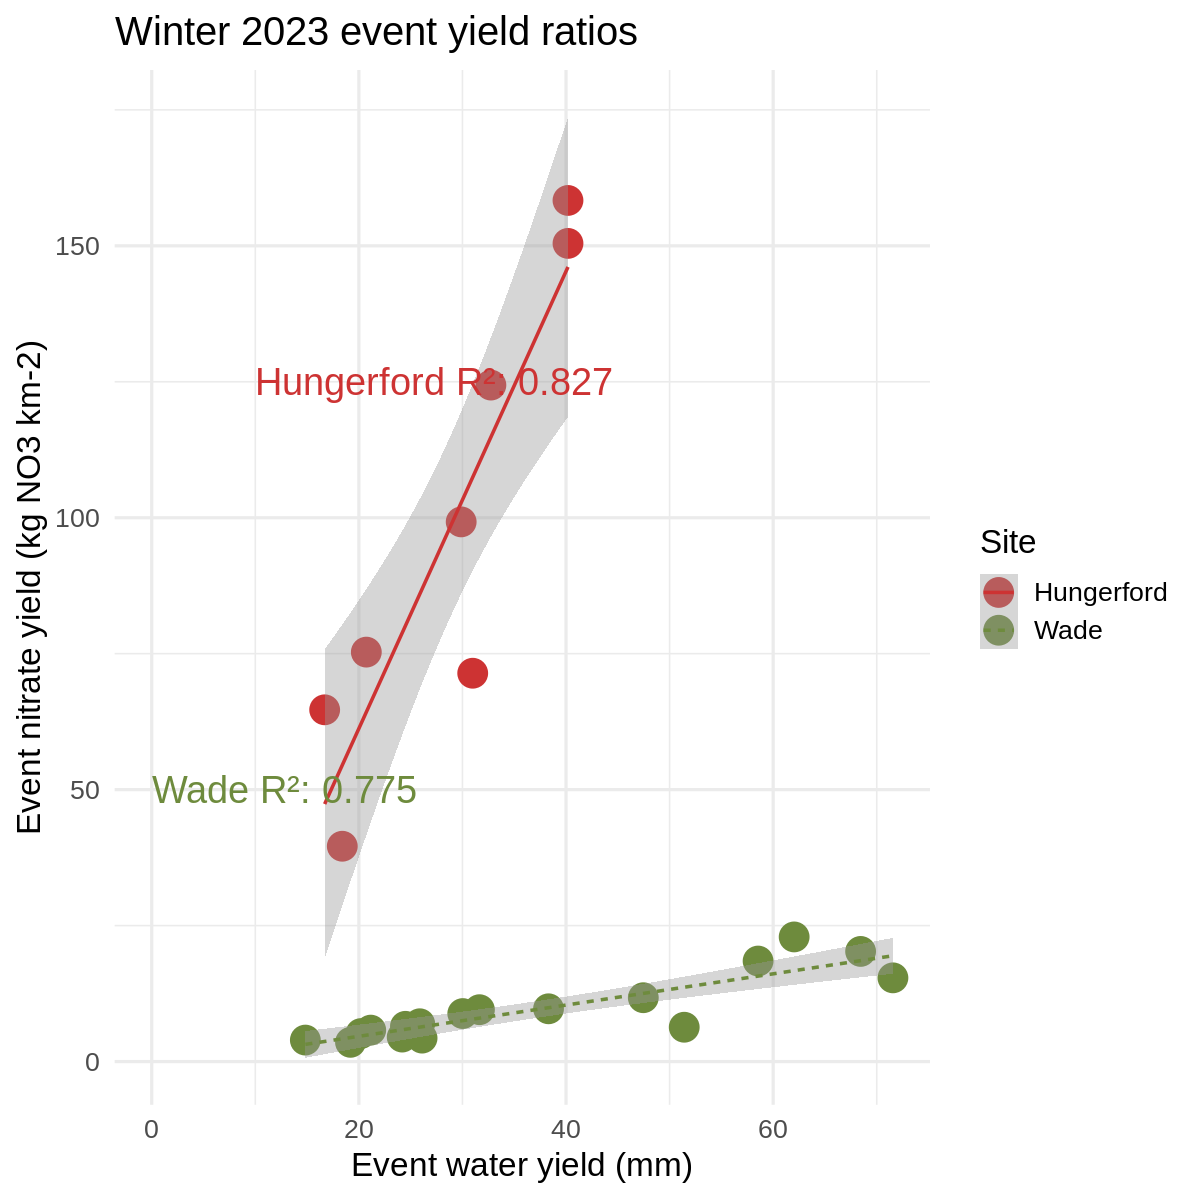

In [4]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 8) +
  geom_smooth(method = lm, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter 2023 event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 200) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 125, label = paste0("Hungerford R²: ", round(hungerford_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 50, label = paste0("Wade R²: ", round(wade_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'


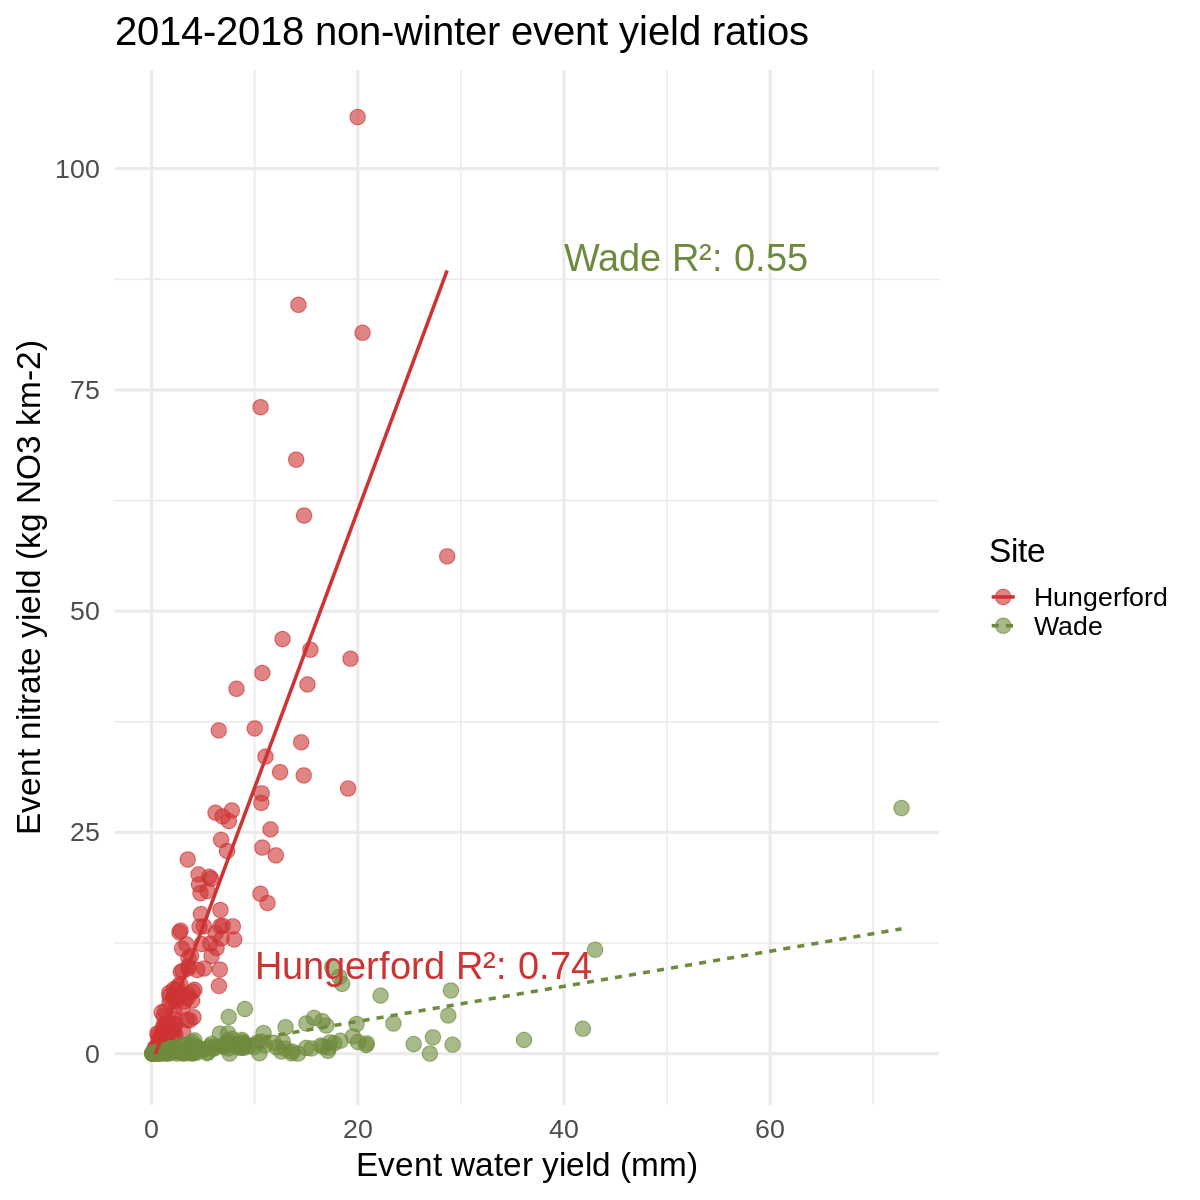

In [5]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_yearly, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 4, alpha = 0.6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "2014-2018 non-winter event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 475) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 40, y = 90, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_smooth()`).”


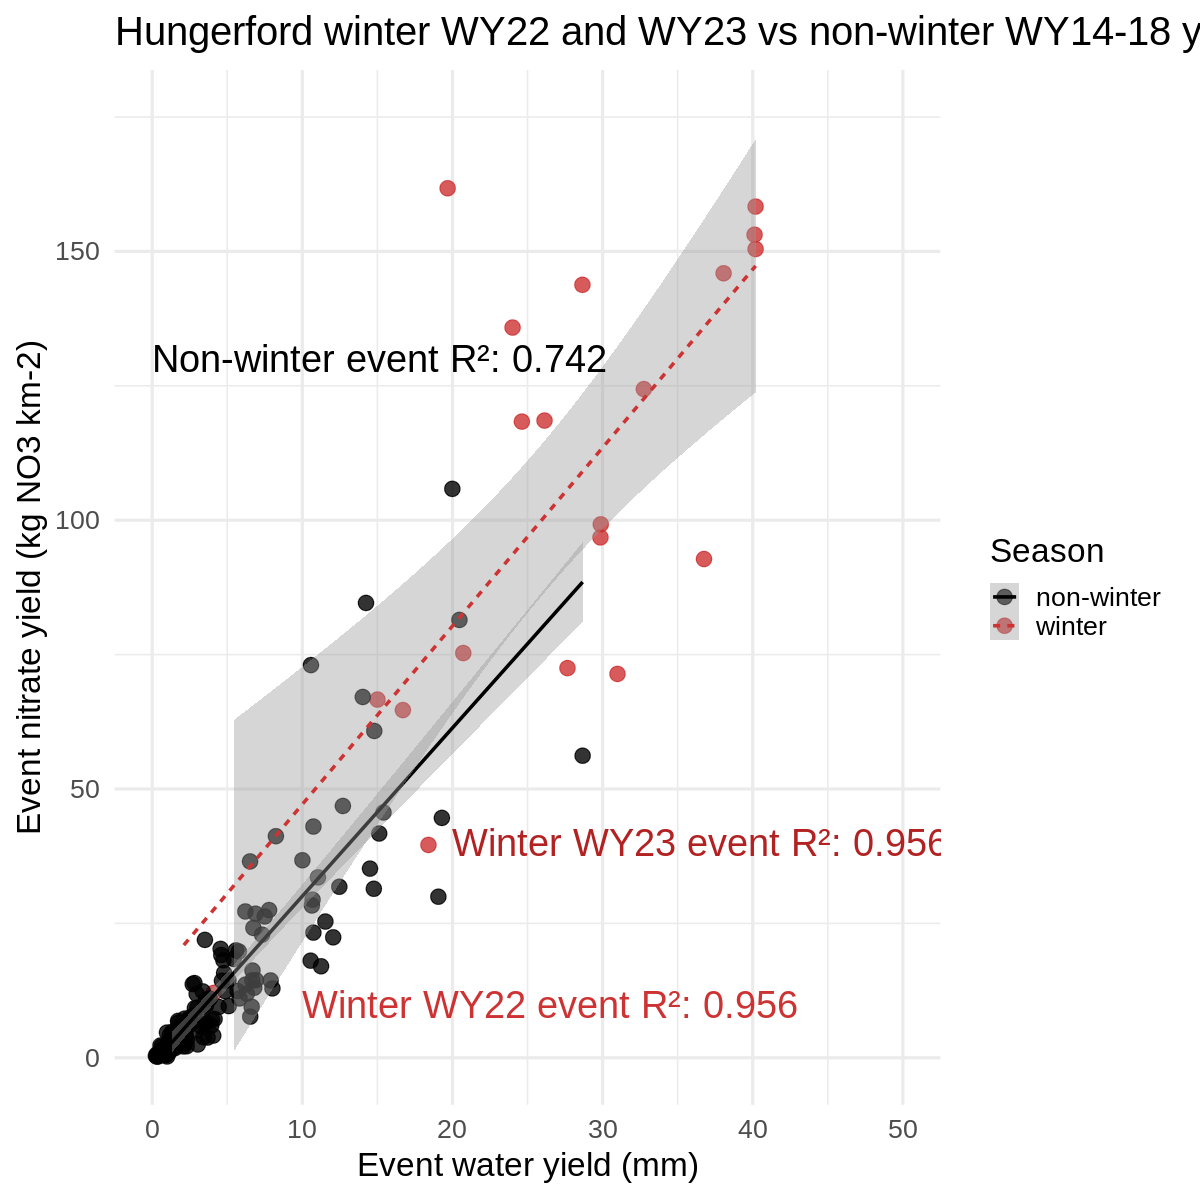

In [6]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Combine the Wade datasets
combined_data_wade <- bind_rows(wade_yield_data_wy22, wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_winter22_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2022'))
hungerford_winter22_r2 <- summary(hungerford_winter22_lm)$r.squared

hungerford_winter23_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2023'))
hungerford_winter23_r2 <- summary(hungerford_winter23_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_hungerford, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data_hungerford, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "#CD3333", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Hungerford winter WY22 and WY23 vs non-winter WY14-18 yield ratios") +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Winter WY22 event R²: ", round(hungerford_winter22_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 20, y = 40, label = paste0("Winter WY23 event R²: ", round(hungerford_winter22_r2, 3)), 
           color = "#B22222", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 130, label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_smooth()`).”


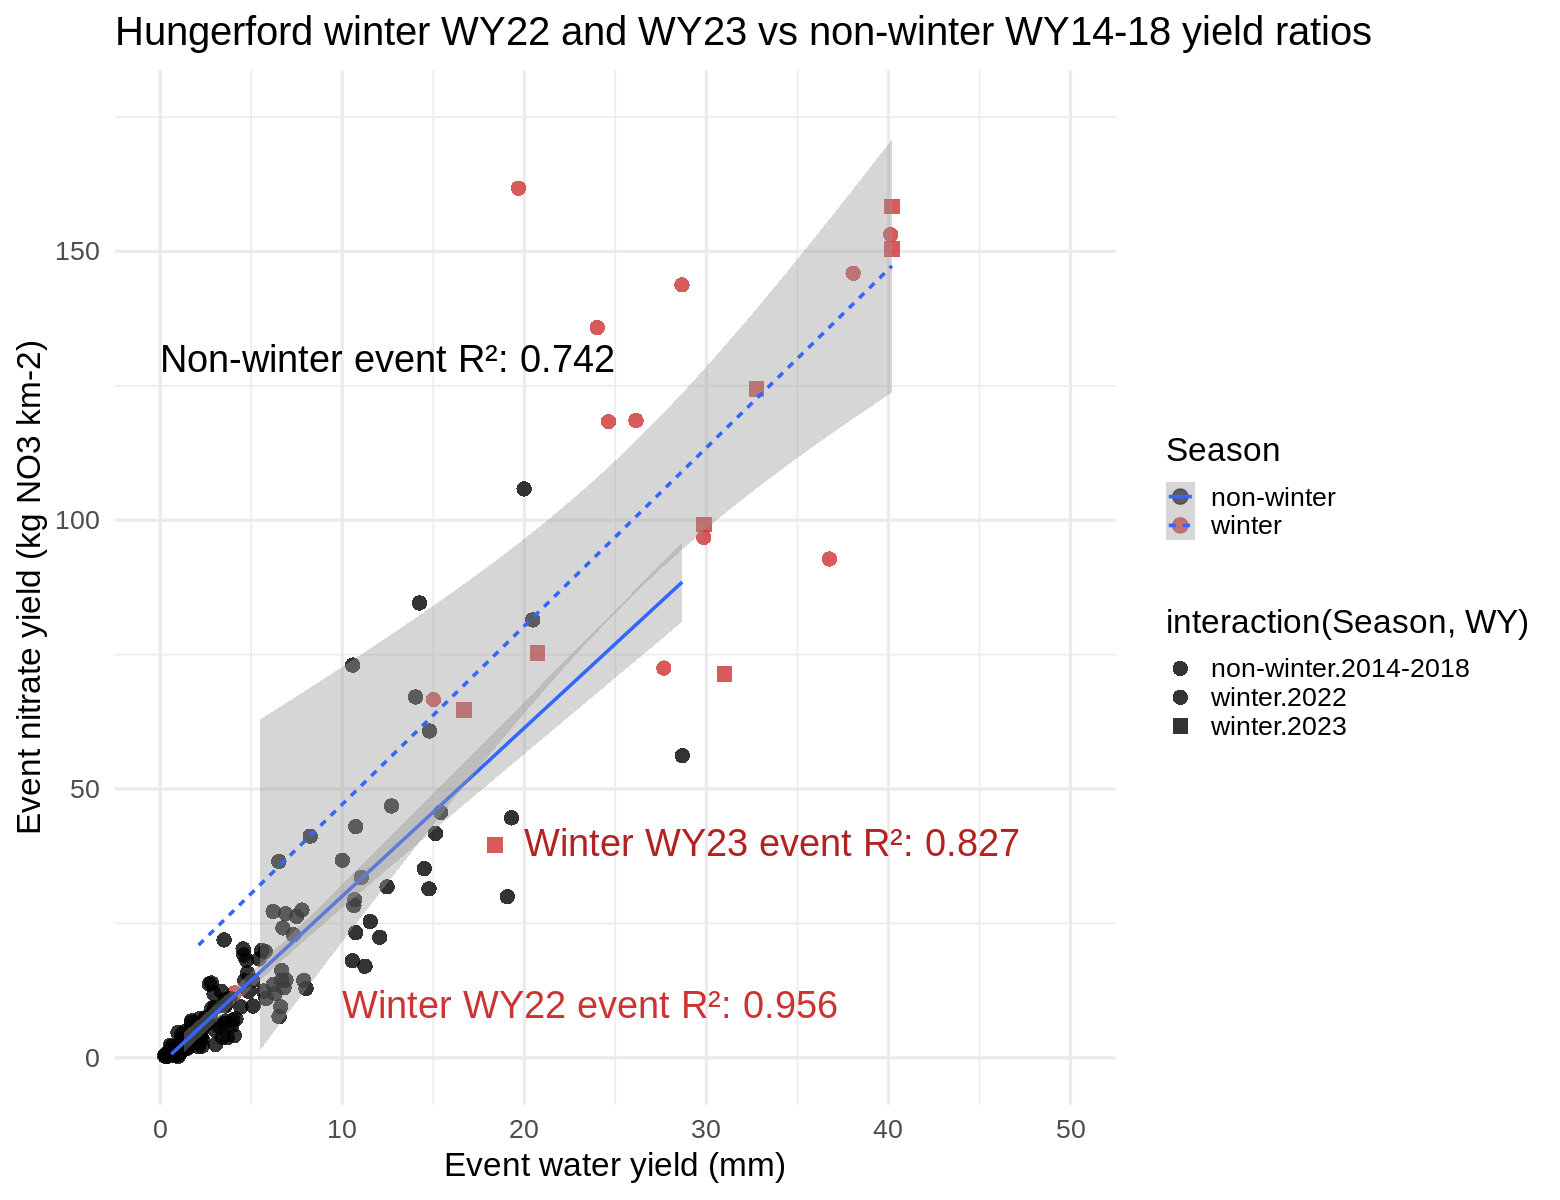

In [7]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Combine the Wade datasets
combined_data_wade <- bind_rows(wade_yield_data_wy22, wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_winter22_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2022'))
hungerford_winter22_r2 <- summary(hungerford_winter22_lm)$r.squared

hungerford_winter23_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2023'))
hungerford_winter23_r2 <- summary(hungerford_winter23_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_hungerford, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 13, repr.plot.height = 10) 

ggplot(combined_data_hungerford, aes(x = water_yield_mm, y = constit_yield_mm)) +
  geom_point(aes(color = Season, shape = interaction(Season, WY)), size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(
    values = c(
      "winter" = "#CD3333",  # Winter 2022
      "winter_2023" = "#8B0000",  # Winter 2023
      "non-winter" = "black"
    )
  ) +
  scale_shape_manual(
    values = c(
      "winter.2022" = 16,   # Circle
      "winter.2023" = 15,   # Square
      "non-winter.2014-2018" = 16  # Circle
    )
  ) +
  labs(
    x = "Event water yield (mm)",
    y = "Event nitrate yield (kg NO3 km-2)",
    title = "Hungerford winter WY22 and WY23 vs non-winter WY14-18 yield ratios"
  ) +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate(
    "text", x = 10, y = 10,
    label = paste0("Winter WY22 event R²: ", round(hungerford_winter22_r2, 3)),
    color = "#CD3333", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 20, y = 40,
    label = paste0("Winter WY23 event R²: ", round(hungerford_winter23_r2, 3)),
    color = "#B22222", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 0, y = 130,
    label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)),
    color = "black", hjust = 0, size = 8
  )


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_smooth()`).”


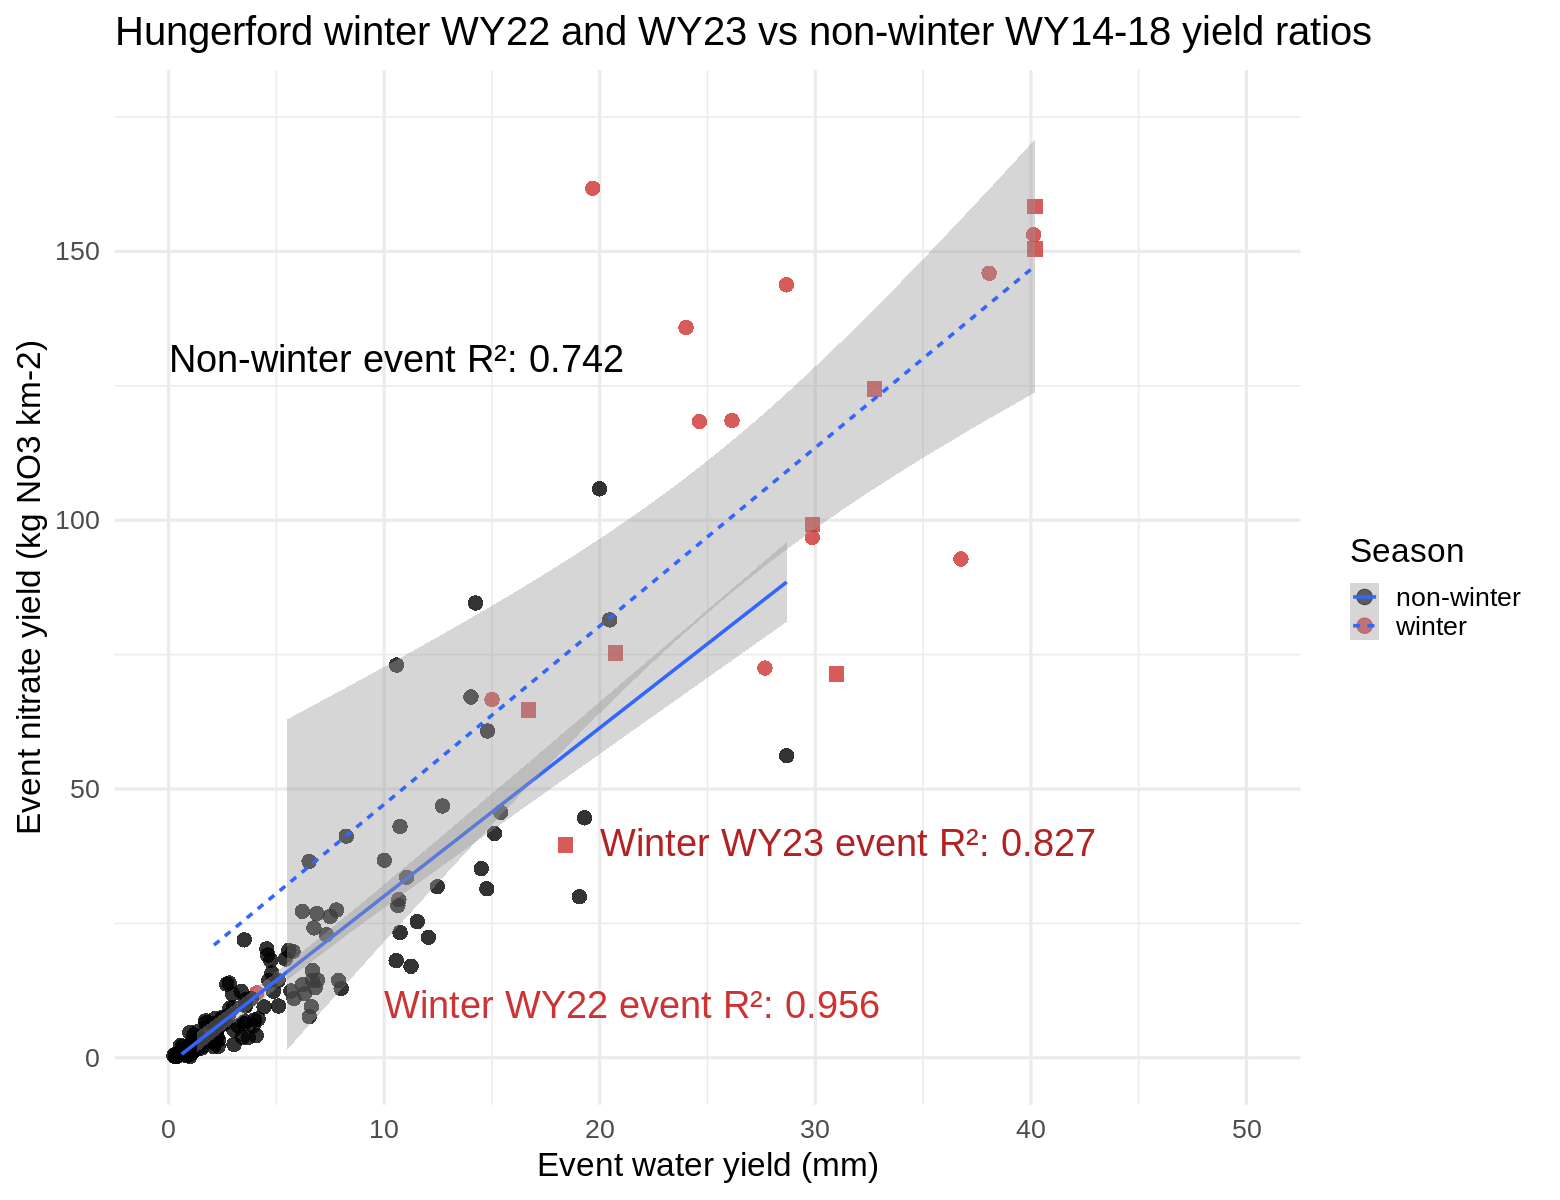

In [8]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Combine the Wade datasets
combined_data_wade <- bind_rows(wade_yield_data_wy22, wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_winter22_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2022'))
hungerford_winter22_r2 <- summary(hungerford_winter22_lm)$r.squared

hungerford_winter23_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2023'))
hungerford_winter23_r2 <- summary(hungerford_winter23_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_hungerford, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 13, repr.plot.height = 10) 

ggplot(combined_data_hungerford, aes(x = water_yield_mm, y = constit_yield_mm)) +
  geom_point(
    aes(
      color = Season,
      shape = ifelse(Season == "winter" & WY == "2023", "Winter 2023", "Other")
    ),
    size = 4, alpha = 0.8
  ) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(
    values = c(
      "winter" = "#CD3333",  # Winter
      "non-winter" = "black"
    )
  ) +
  scale_shape_manual(
    values = c(
      "Winter 2023" = 15,   # Square
      "Other" = 16          # Circle
    ),
    guide = "none"  # Hides the shape legend
  ) +
  labs(
    x = "Event water yield (mm)",
    y = "Event nitrate yield (kg NO3 km-2)",
    title = "Hungerford winter WY22 and WY23 vs non-winter WY14-18 yield ratios",
    color = "Season"
  ) +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate(
    "text", x = 10, y = 10,
    label = paste0("Winter WY22 event R²: ", round(hungerford_winter22_r2, 3)),
    color = "#CD3333", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 20, y = 40,
    label = paste0("Winter WY23 event R²: ", round(hungerford_winter23_r2, 3)),
    color = "#B22222", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 0, y = 130,
    label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)),
    color = "black", hjust = 0, size = 8
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_smooth()`).”


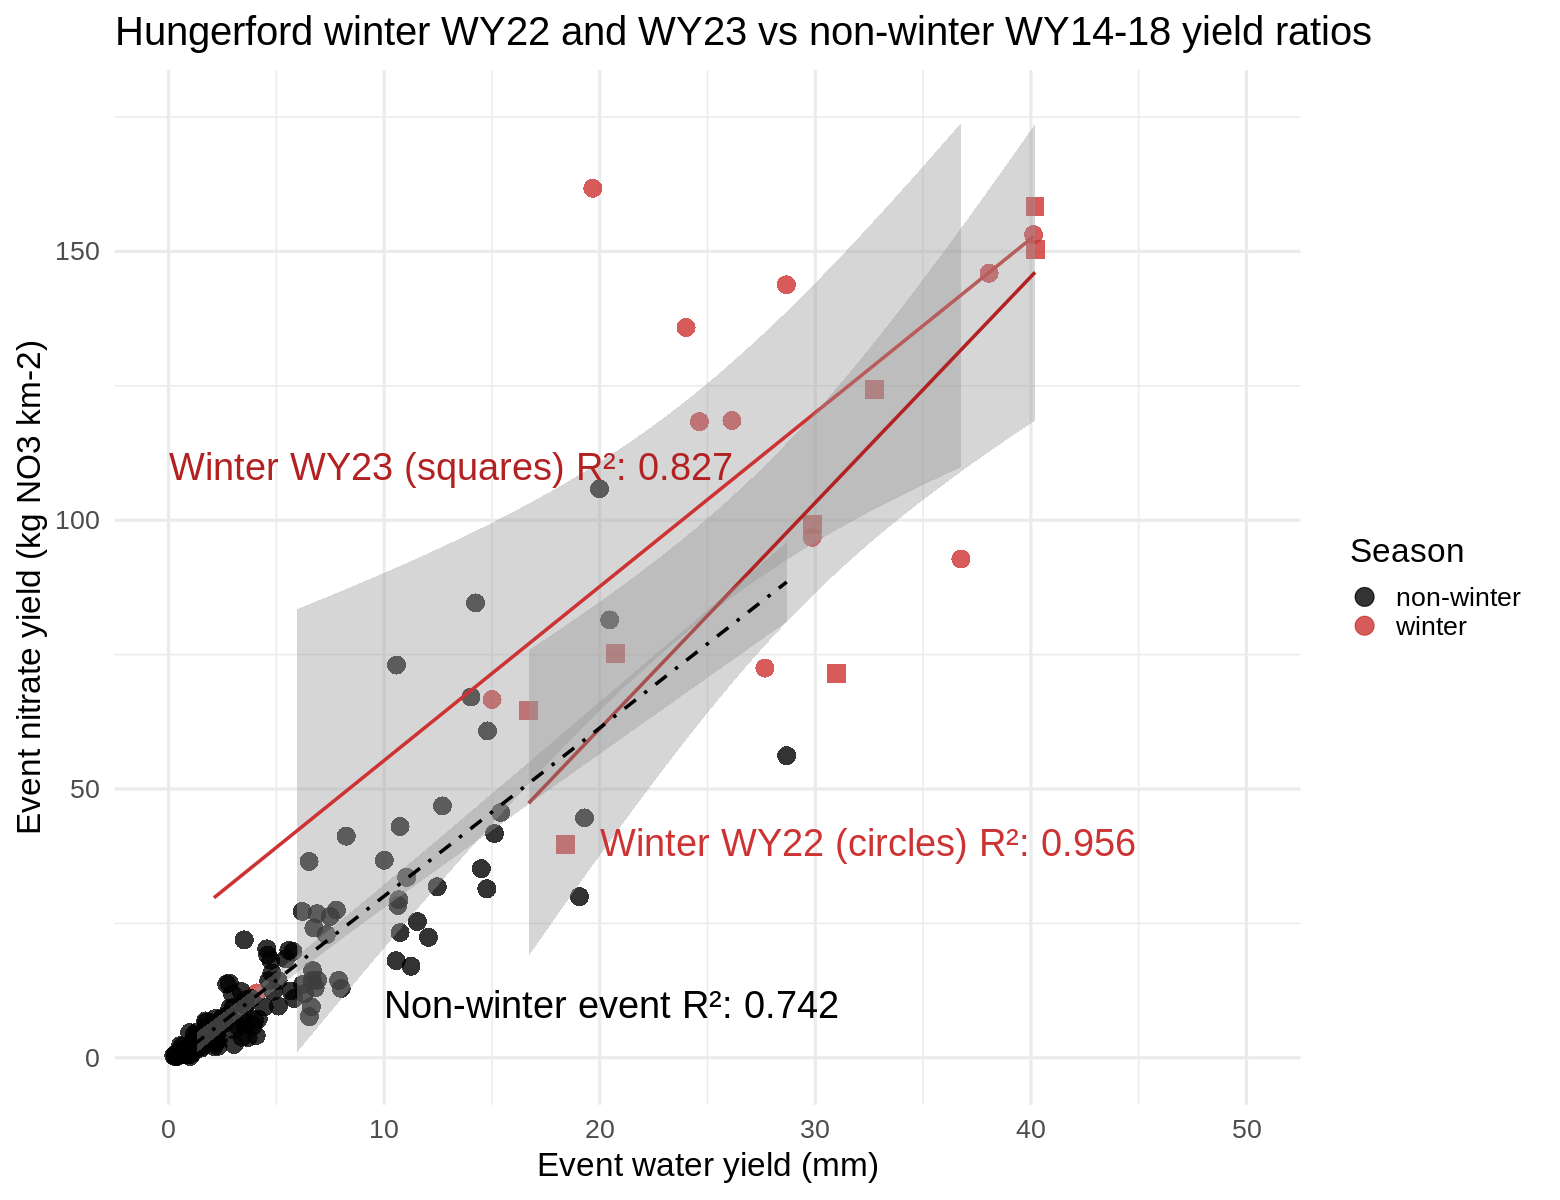

In [9]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Combine the Wade datasets
combined_data_wade <- bind_rows(wade_yield_data_wy22, wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_winter22_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2022'))
hungerford_winter22_r2 <- summary(hungerford_winter22_lm)$r.squared

hungerford_winter23_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_hungerford, Season == "winter", WY =='2023'))
hungerford_winter23_r2 <- summary(hungerford_winter23_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_hungerford, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 13, repr.plot.height = 10) 

ggplot(combined_data_hungerford, aes(x = water_yield_mm, y = constit_yield_mm)) +
  geom_point(
    aes(
      color = Season,
      shape = ifelse(Season == "winter" & WY == "2023", "Winter 2023", "Other")
    ),
    size = 5, alpha = 0.8
  ) +
  geom_smooth(
    data = filter(combined_data_hungerford, Season == "winter", WY == "2022"),
    method = lm, color = "#CD3333", linetype = "solid", se = TRUE
  ) +
  geom_smooth(
    data = filter(combined_data_hungerford, Season == "winter", WY == "2023"),
    method = lm, color = "#B22222", linetype = "solid", se = TRUE
  ) +
  geom_smooth(
    data = filter(combined_data_hungerford, Season == "non-winter"),
    method = lm, color = "black", linetype = "dotdash", se = TRUE
  ) +
  scale_color_manual(
    values = c(
      "winter" = "#CD3333",  # Winter
      "non-winter" = "black"
    )
  ) +
  scale_shape_manual(
    values = c(
      "Winter 2023" = 15,   # Square
      "Other" = 16          # Circle
    ),
    guide = "none"  # Hides the shape legend
  ) +
  labs(
    x = "Event water yield (mm)",
    y = "Event nitrate yield (kg NO3 km-2)",
    title = "Hungerford winter WY22 and WY23 vs non-winter WY14-18 yield ratios",
    color = "Season"
  ) +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate(
    "text", x = 20, y = 40,
    label = paste0("Winter WY22 (circles) R²: ", round(hungerford_winter22_r2, 3)),
    color = "#CD3333", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 0, y = 110,
    label = paste0("Winter WY23 (squares) R²: ", round(hungerford_winter23_r2, 3)),
    color = "#B22222", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 10, y = 10,
    label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)),
    color = "black", hjust = 0, size = 8
  )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


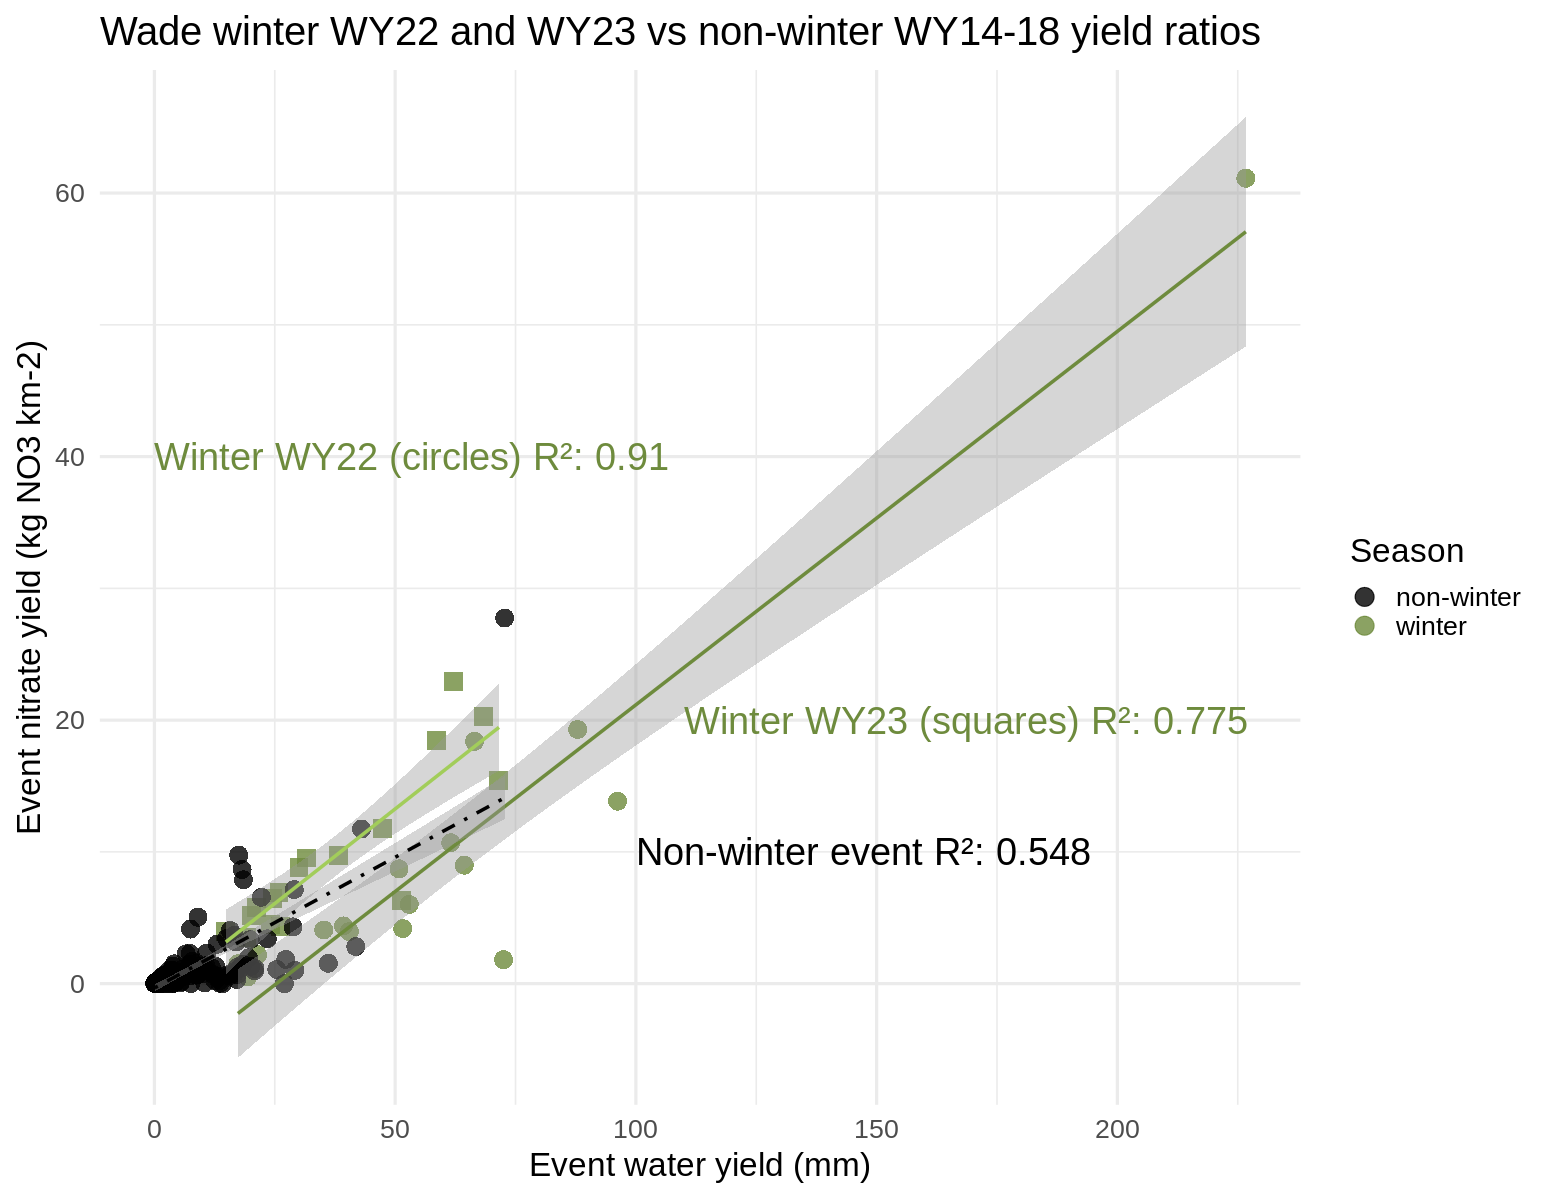

In [10]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Combine the Wade datasets
combined_data_wade <- bind_rows(wade_yield_data_wy22, wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
wade_winter22_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_wade, Season == "winter", WY =='2022'))
wade_winter22_r2 <- summary(wade_winter22_lm)$r.squared

wade_winter23_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_wade, Season == "winter", WY =='2023'))
wade_winter23_r2 <- summary(wade_winter23_lm)$r.squared

wade_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_wade, Season == "non-winter"))
wade_nonwinter_r2 <- summary(wade_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 13, repr.plot.height = 10) 

ggplot(combined_data_wade, aes(x = water_yield_mm, y = constit_yield_mm)) +
  geom_point(
    aes(
      color = Season,
      shape = ifelse(Season == "winter" & WY == "2023", "Winter 2023", "Other")
    ),
    size = 5, alpha = 0.8
  ) +
  geom_smooth(
    data = filter(combined_data_wade, Season == "winter", WY == "2022"),
    method = lm, color = "darkolivegreen4", linetype = "solid", se = TRUE
  ) +
  geom_smooth(
    data = filter(combined_data_wade, Season == "winter", WY == "2023"),
    method = lm, color = "darkolivegreen3", linetype = "solid", se = TRUE
  ) +
  geom_smooth(
    data = filter(combined_data_wade, Season == "non-winter"),
    method = lm, color = "black", linetype = "dotdash", se = TRUE
  ) +
  scale_color_manual(
    values = c(
      "winter" = "darkolivegreen4",  # Winter
      "non-winter" = "black"
    )
  ) +
  scale_shape_manual(
    values = c(
      "Winter 2023" = 15,   # Square
      "Other" = 16          # Circle
    ),
    guide = "none"  # Hides the shape legend
  ) +
  labs(
    x = "Event water yield (mm)",
    y = "Event nitrate yield (kg NO3 km-2)",
    title = "Wade winter WY22 and WY23 vs non-winter WY14-18 yield ratios",
    color = "Season"
  ) +
  #xlim(0, 50) +
  #ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate(
    "text", x = 0, y = 40,
    label = paste0("Winter WY22 (circles) R²: ", round(wade_winter22_r2, 3)),
    color = "darkolivegreen4", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 110, y = 20,
    label = paste0("Winter WY23 (squares) R²: ", round(wade_winter23_r2, 3)),
    color = "darkolivegreen4", hjust = 0, size = 8
  ) +
  annotate(
    "text", x = 100, y = 10,
    label = paste0("Non-winter event R²: ", round(wade_nonwinter_r2, 3)),
    color = "black", hjust = 0, size = 8
  )

# CUMULATIVE EXPORT PLOTS

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


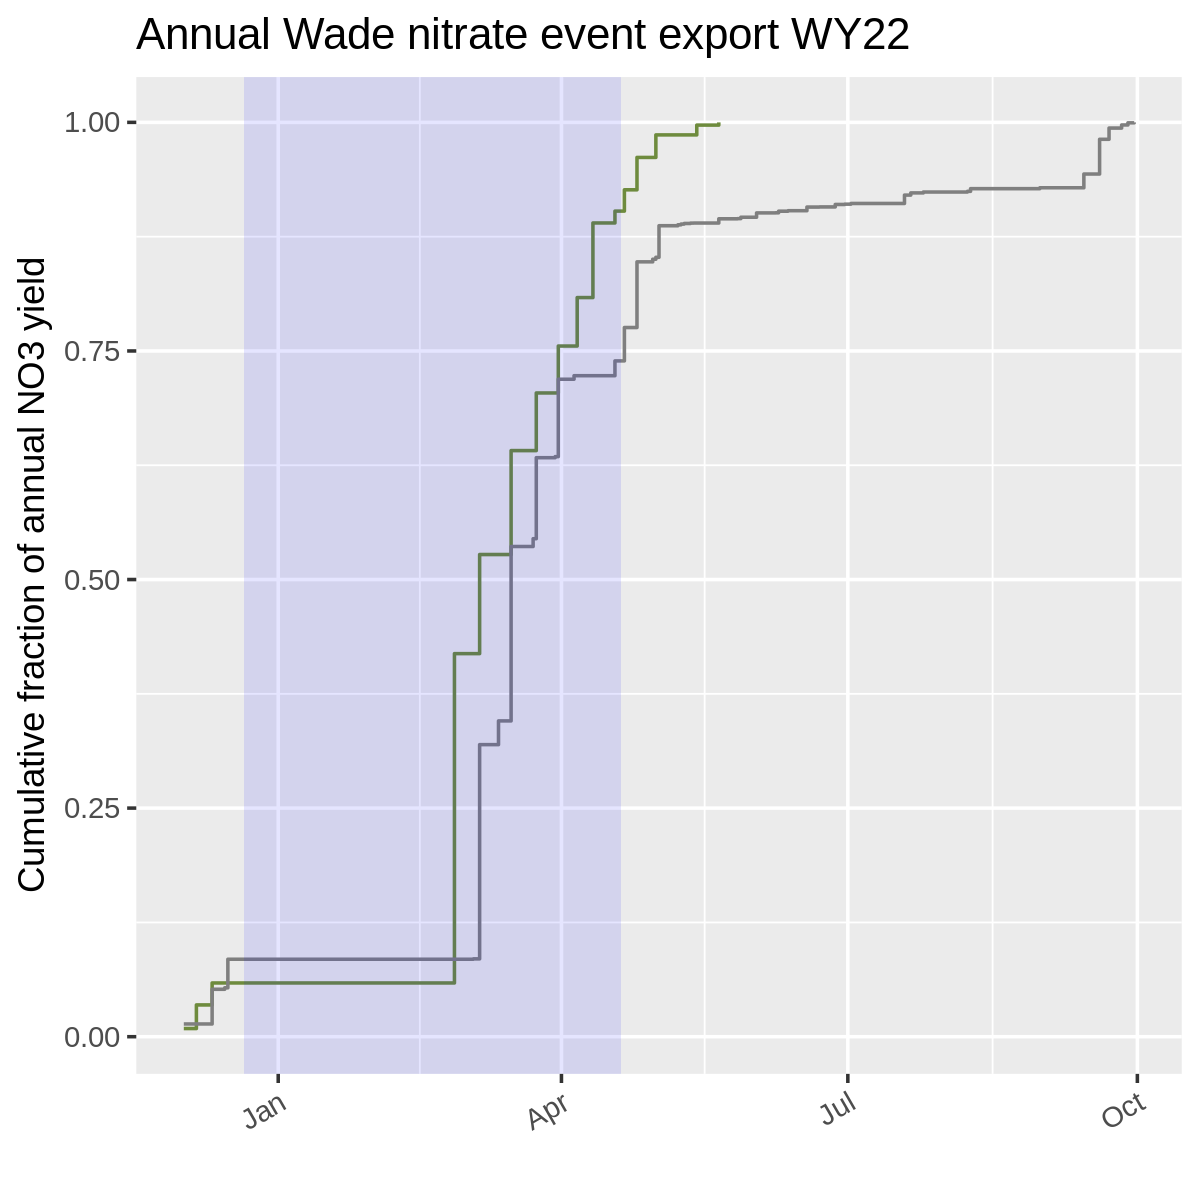

In [11]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
#combined_data_hungerford_22 <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_yearly_22)
combined_data_hungerford_22 <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_yearly_22)

# Combine the Wade datasets
combined_data_wade_22 <- bind_rows(wade_yield_data_wy22, wade_yield_data_yearly_22)

# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2022-02-16", "2022-03-05", "2022-03-16", "2022-04-07")),
  xmax = as.Date(c("2022-02-23", "2022-03-10", "2022-03-22", "2022-04-11"))
)

# Define meteorological winter (12/21-04/20)
ice_on <- data.frame(
  xmin = as.Date(c("2021-12-21")),
  xmax = as.Date(c("2022-04-20"))
)

# Add cumulative sums grouped by site
combined_data_wade_22 <- combined_data_wade_22 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
#p1 <- ggplot(combined_data_wade_22, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  #geom_step(size = 1) +  # Stepwise line
  #scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  #geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  #labs(x = "Date",
       #y = "Cumulative water yield (mm)",
       #title = "Cumulative water yield winter WY22") +
  #theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_wade_22, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Wade nitrate event export WY22") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
#library(patchwork)
#p1 + p2

#ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "wade_WY22_wateryield.png")
#ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "wade_WY22_nitrateyield.png")

print(p2)

In [12]:
wade_yield_data_yearly_22

X,run_id,start,end,tot_q_m3,tot_constit_mgN,duration_hrs,water_yield_mm,constit_yield_mm,intensity_m3_hr,filter_para,sf_thresh,storm_id,Date
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,"FC = 0.996, SFT = 0.12",2021-12-02 21:15:00,2021-12-05 08:45:00,193320.623,16489872.03,59.75,11.5760852,0.987417487,3235.4916,0.996,0.12,storm_1,2021-12-02
2,"FC = 0.996, SFT = 0.12",2021-12-11 14:45:00,2021-12-15 03:00:00,399679.706,45022723.14,92.00,23.9329165,2.695971445,4344.3446,0.996,0.12,storm_2,2021-12-11
3,"FC = 0.996, SFT = 0.12",2021-12-15 05:30:00,2021-12-15 21:30:00,14885.372,1899248.39,16.25,0.8913397,0.113727449,916.0229,0.996,0.12,storm_3,2021-12-15
4,"FC = 0.996, SFT = 0.12",2021-12-16 06:00:00,2022-01-26 18:00:00,311883.496,37046764.95,45.25,18.6756584,2.218369158,6892.4529,0.996,0.12,storm_4,2021-12-16
5,"FC = 0.996, SFT = 0.12",2022-03-04 07:45:00,2022-03-04 07:45:00,1867.049,479080.70,4.00,0.1117993,0.028687467,466.7622,0.996,0.12,storm_5,2022-03-04
6,"FC = 0.996, SFT = 0.12",2022-03-06 07:45:00,2022-03-06 08:00:00,2240.418,557363.57,5.00,0.1341568,0.033375064,448.0836,0.996,0.12,storm_6,2022-03-06
7,"FC = 0.996, SFT = 0.12",2022-03-06 08:45:00,2022-03-06 08:45:00,1753.217,433351.67,4.00,0.1049831,0.025949202,438.3042,0.996,0.12,storm_7,2022-03-06
8,"FC = 0.996, SFT = 0.12",2022-03-06 16:30:00,2022-03-11 09:30:00,997758.680,276803369.81,159.50,59.7460288,16.575052085,6255.5403,0.996,0.12,storm_8,2022-03-06
9,"FC = 0.996, SFT = 0.12",2022-03-12 09:00:00,2022-03-14 18:45:00,139424.075,30770769.76,65.50,8.3487470,1.842561063,2128.6118,0.996,0.12,storm_9,2022-03-12


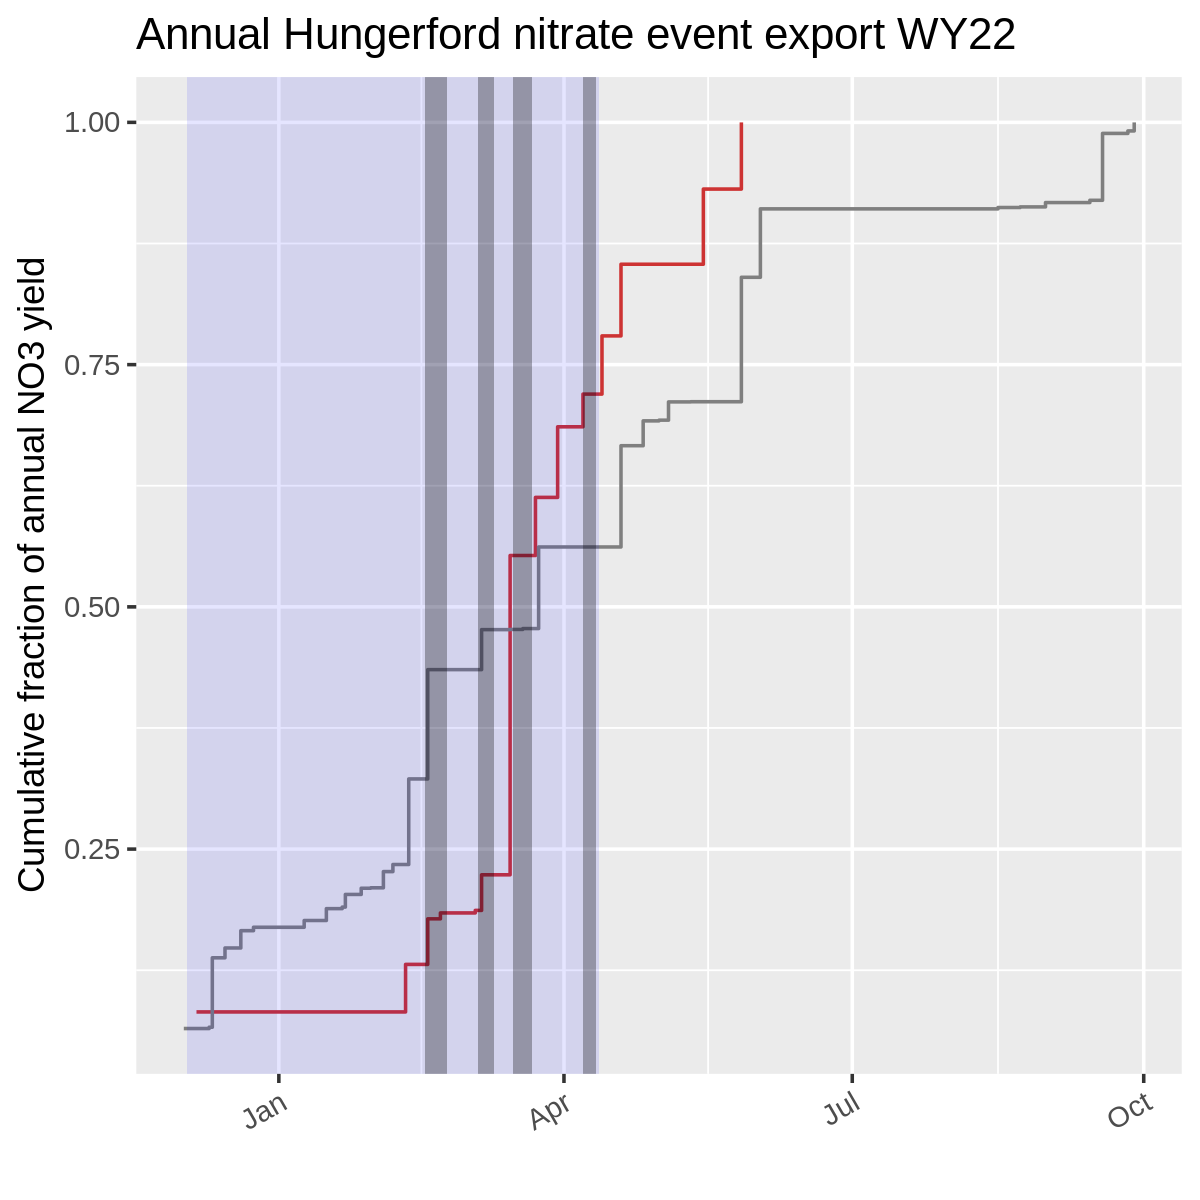

In [13]:
# Load required packages
library(tidyverse)

# Bring in winter 2022 Hungerford
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Hungerford
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in winter 2022 Wade
wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2022')

# Bring in winter 2023 Wade
wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter") %>%
  mutate(WY = '2023')

# Bring in non-winter Hungerford for 2014-2018 from Kincaid 2020
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Bring in non-winter Wade for 2014-2018 from Kincaid 2020
wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter") %>%
  mutate(WY = '2014-2018')

# Combine the Hungerford datasets
combined_data_hungerford_22 <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_yearly_22)

# Combine the Wade datasets
combined_data_wade_22 <- bind_rows(wade_yield_data_wy22, wade_yield_data_yearly_22)

# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2022-02-16", "2022-03-05", "2022-03-16", "2022-04-07")),
  xmax = as.Date(c("2022-02-23", "2022-03-10", "2022-03-22", "2022-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2021-12-03")),
  xmax = as.Date(c("2022-04-12"))
)

# Add cumulative sums grouped by site
combined_data_hungerford_22 <- combined_data_hungerford_22 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data_hungerford_22, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY22") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_hungerford_22, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Hungerford nitrate event export WY22") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
#library(patchwork)
#p1 + p2

#ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "hungerford_WY22_wateryield.png")
#ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "hungerford_WY22_nitrateyield.png")

print(p2)

# Soil resin NO3 availability

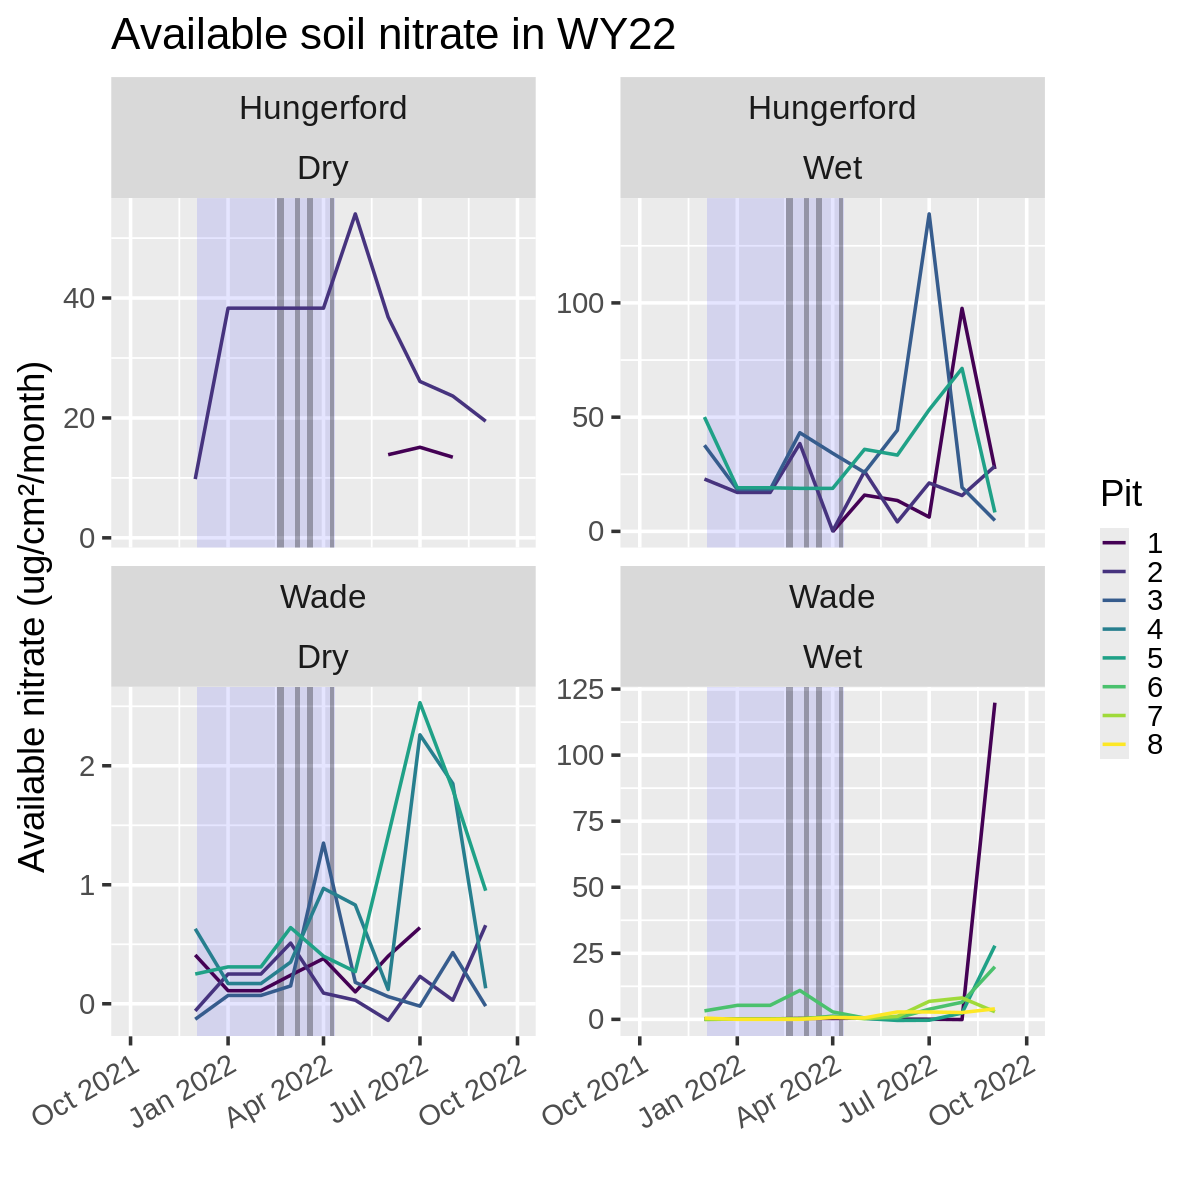

In [14]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2021-12-03")),
  xmax = as.Date(c("2022-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy22 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2022-02-16", "2022-03-05", "2022-03-16", "2022-04-07")),
  xmax = as.Date(c("2022-02-23", "2022-03-10", "2022-03-22", "2022-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2021-10-01")),
  xmax = as.Date(c("2022-09-30"))
)

# Plot available/cumulative available nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = ug_cm2_month, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Available nitrate (ug/cm²/month)",
       title = "Available soil nitrate in WY22") +
  scale_x_date(limits = as.Date(c("2021-10-01", "2022-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")

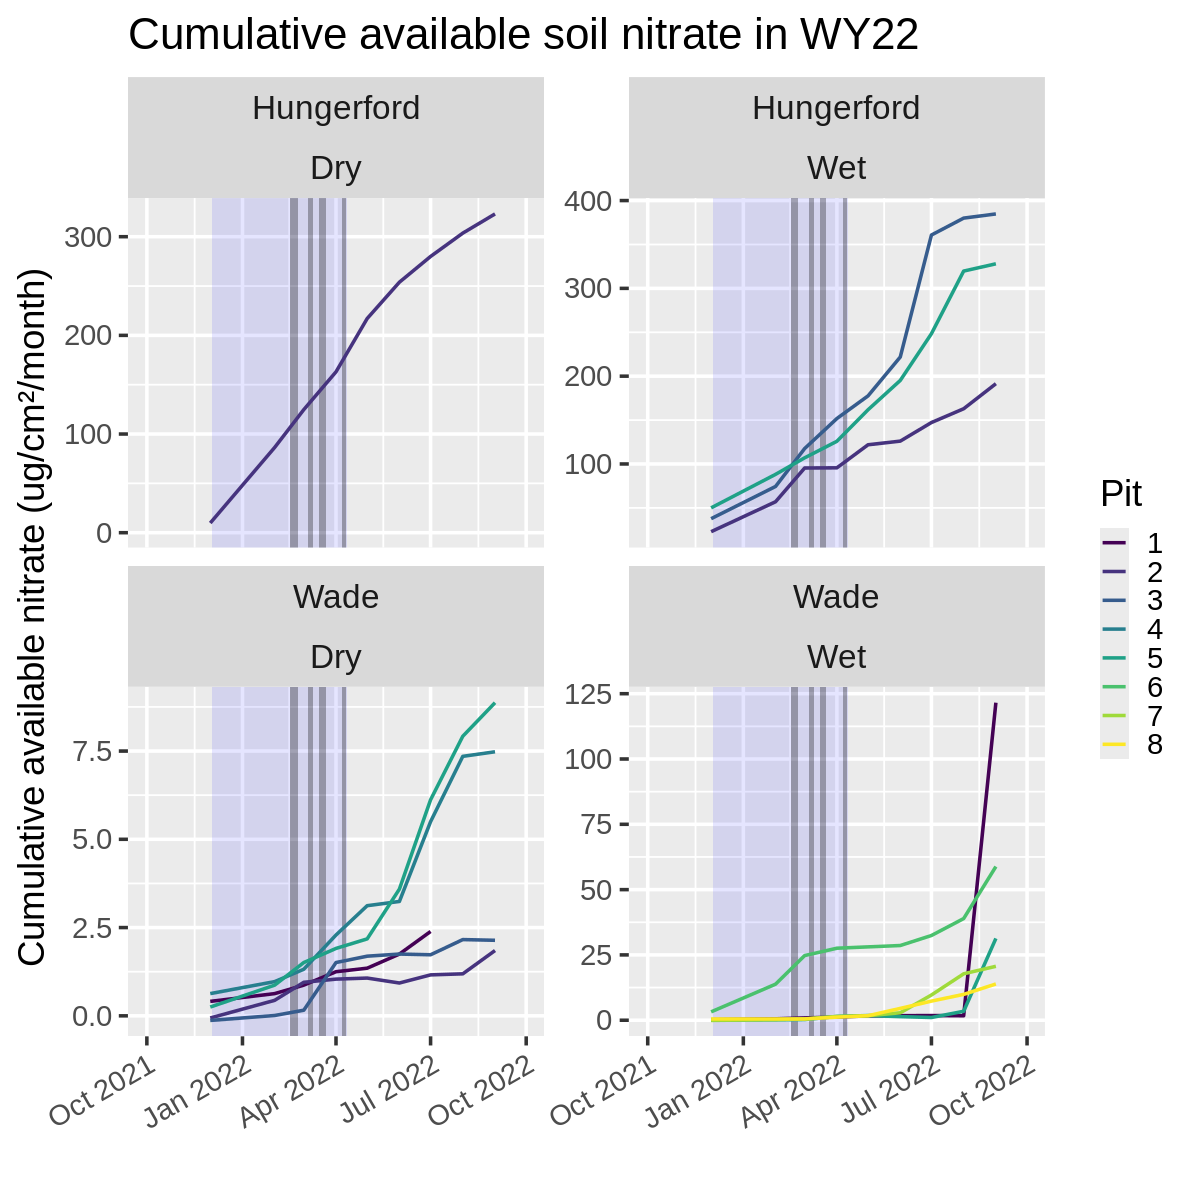

In [15]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2021-12-03")),
  xmax = as.Date(c("2022-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy22 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2022-02-16", "2022-03-05", "2022-03-16", "2022-04-07")),
  xmax = as.Date(c("2022-02-23", "2022-03-10", "2022-03-22", "2022-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2021-10-01")),
  xmax = as.Date(c("2022-09-30"))
)

# Plot available/cumulative available nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative available nitrate (ug/cm²/month)",
       title = "Cumulative available soil nitrate in WY22") +
  scale_x_date(limits = as.Date(c("2021-10-01", "2022-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")

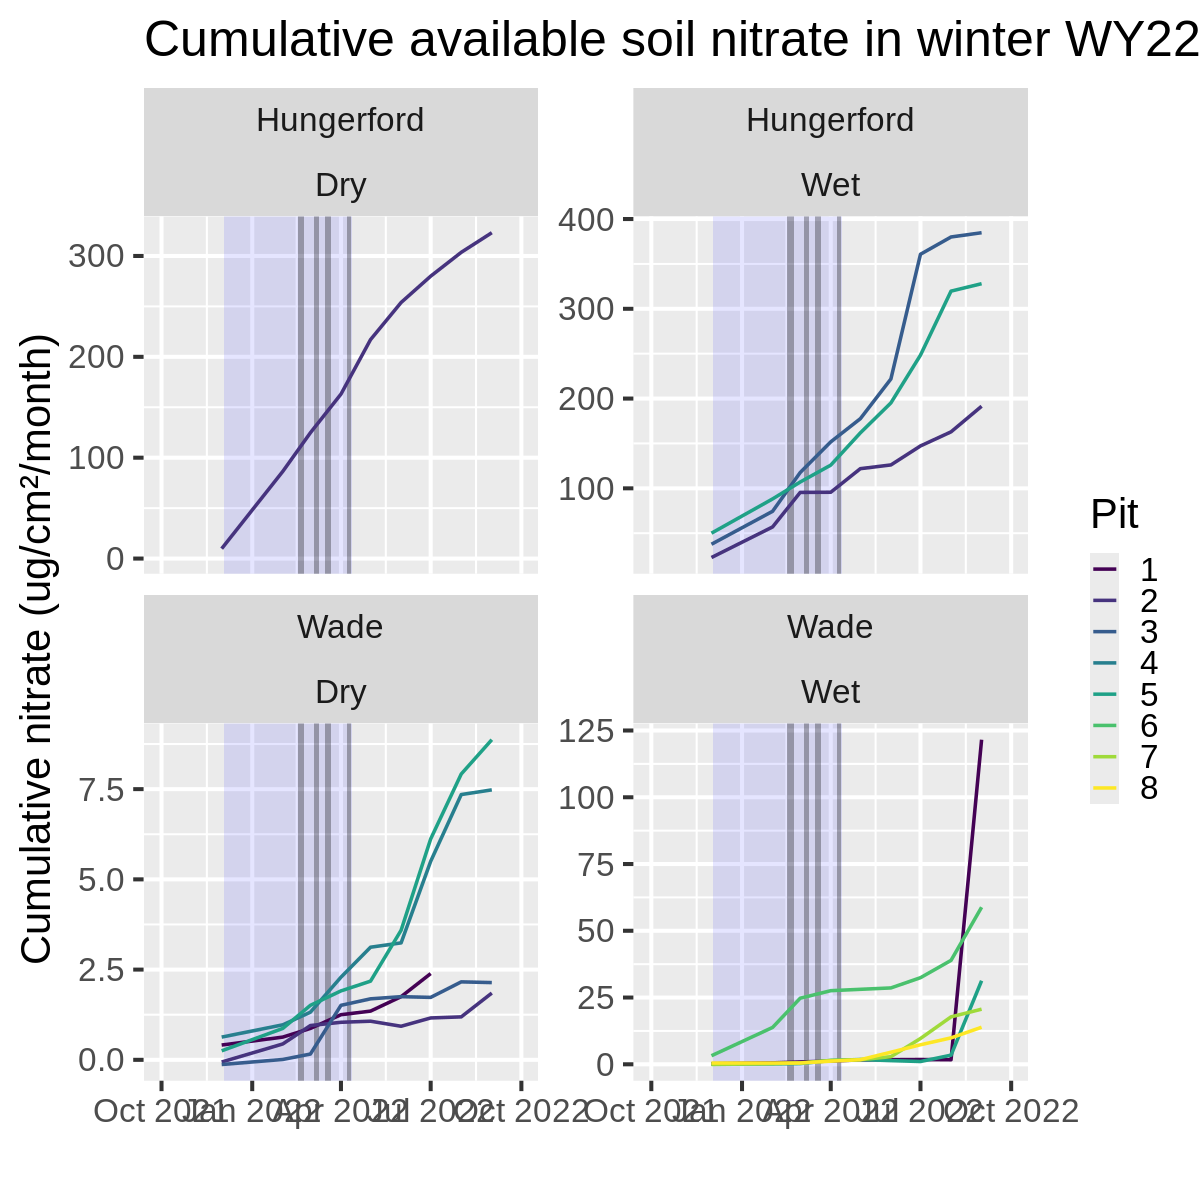

In [16]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2021-12-03")),
  xmax = as.Date(c("2022-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy22 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2022-02-16", "2022-03-05", "2022-03-16", "2022-04-07")),
  xmax = as.Date(c("2022-02-23", "2022-03-10", "2022-03-22", "2022-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2021-10-01")),
  xmax = as.Date(c("2022-09-30"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative nitrate (ug/cm²/month)",
       title = "Cumulative available soil nitrate in winter WY22") +
  scale_x_date(limits = as.Date(c("2021-10-01", "2022-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 25)

# Display the plot
print(p)

# Optionally save the plot
ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")


Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_rect()`).”
Warning message:
“Removed 16 rows containing missing values or values outside the scale range (`geom_rect()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_rect()`).”
Warning message:
“Removed 16 rows containing missing values or values outside the scale range (`geom_rect()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range (`geom_line()`).”


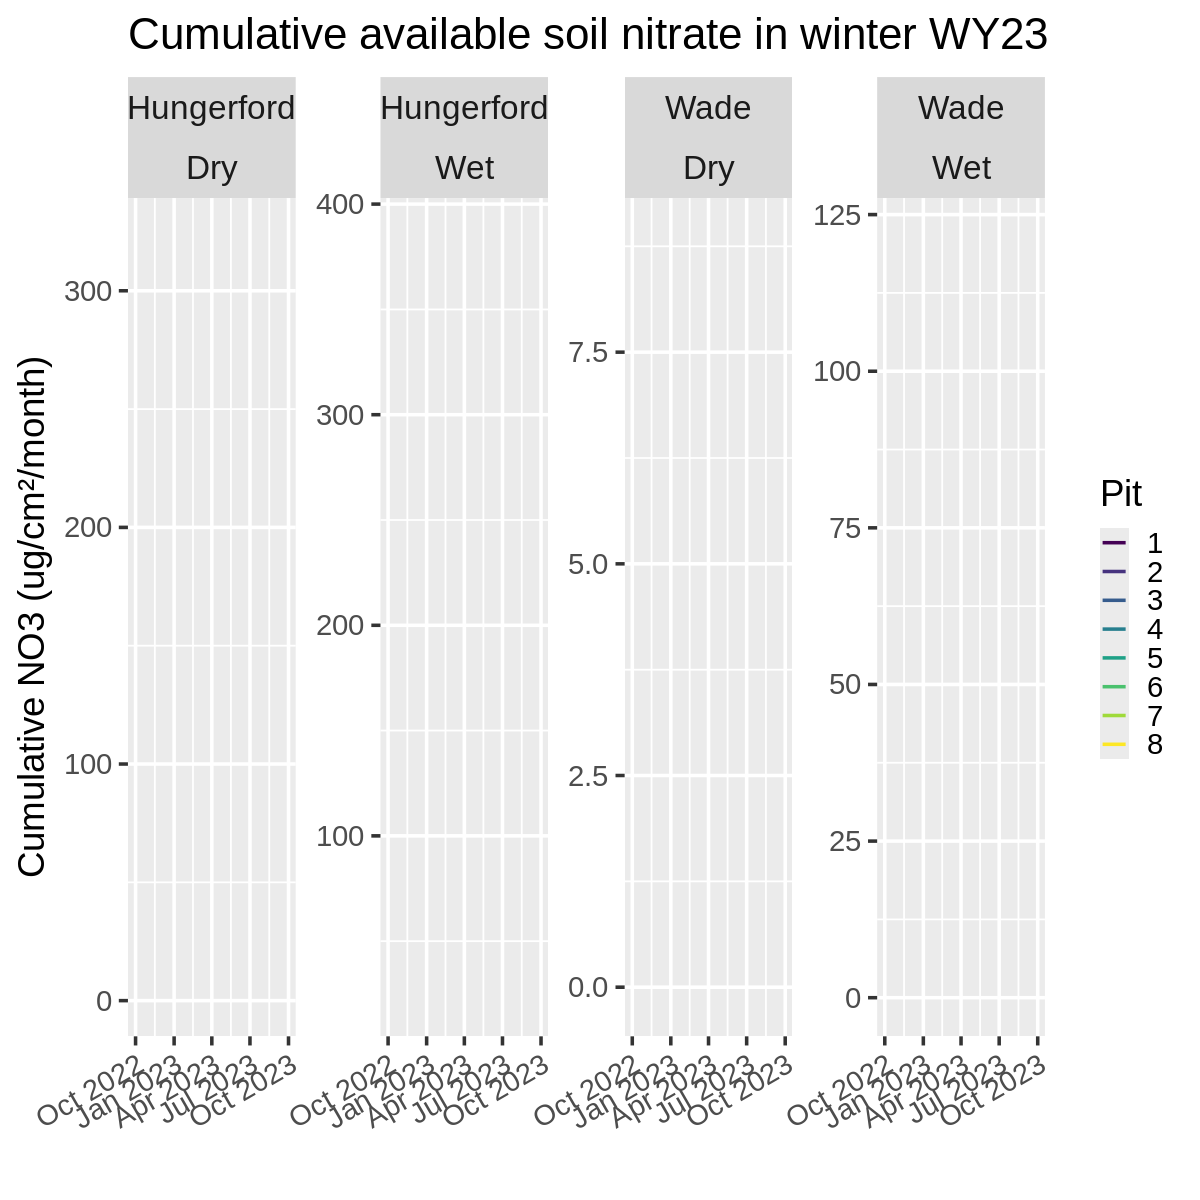

In [17]:
# Plot cumulative nitrate with faceting in a 1x4 layout and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y", nrow = 1) +  # Adjusted to 1 row
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative NO3 (ug/cm²/month)",
       title = "Cumulative available soil nitrate in winter WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
ggsave(plot = p, width = 18, height = 6, dpi = 300, filename = "cumulative_nitrate_faceted_horizontal.png")


FOr WY22